## Hyperplane Estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

In [2]:
X_and_Y = np.load('./hyperplane-estimation.npy')
X1 = X_and_Y[:, 0]    # Shape: (900,)
X2 = X_and_Y[:, 1]    # Shape: (900,)
Y  = X_and_Y[:, 2]    # Shape: (900,)
print(X1.shape, X2.shape, Y.shape)

(900,) (900,) (900,)


### Original Data

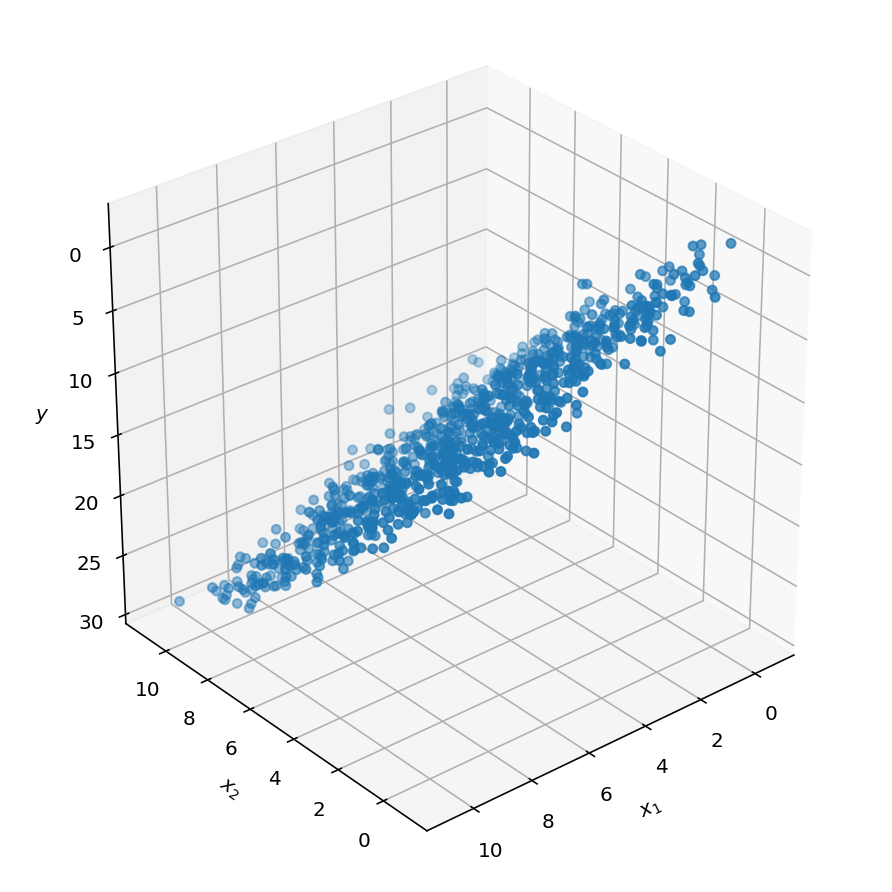

In [3]:
# Visualization.
def vis(w0, w1, w2):
    draw_plane = (w0 is not None) and (w1 is not None) and (w2 is not None)
    if draw_plane:
        num = 30
        X_plane_range = np.linspace(0,10,num)
        X_plane_range = np.linspace(0,10,num)
        X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
        Y_plane = w0 + w1 * X1_plane + w2 * X2_plane

    fig = plt.figure(figsize = (6, 6))
    ax = Axes3D(fig, elev = -150, azim = 130)
    ax.scatter(X1, X2, Y)
    if draw_plane:
        ax.scatter(X1_plane, X2_plane, Y_plane)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    plt.show()
    
vis(None, None, None)

### Hyperplane Estimation Using the Closed Form Solution

Assume data points are represented as matrices $X$ and $Y$, please use the closed form solution to calculate the parameters $W$.

**Hint**: You may refer to HW3 Q4.

In [4]:
# y=w0+w1*x1+w2*x2
X = np.matrix(np.hstack((np.ones((len(X1),1)),
                         X1.reshape(-1,1),
                         X2.reshape(-1,1))))  # X contains 1, X1 and X2.
Y = Y
# Compute W using the closed form solution.
W = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('y = {:.2f} + {:.2f}*x1 + {:.2f}*x2'.format(w0, w1, w2))


y = -0.70 + 0.98*x1 + 1.94*x2


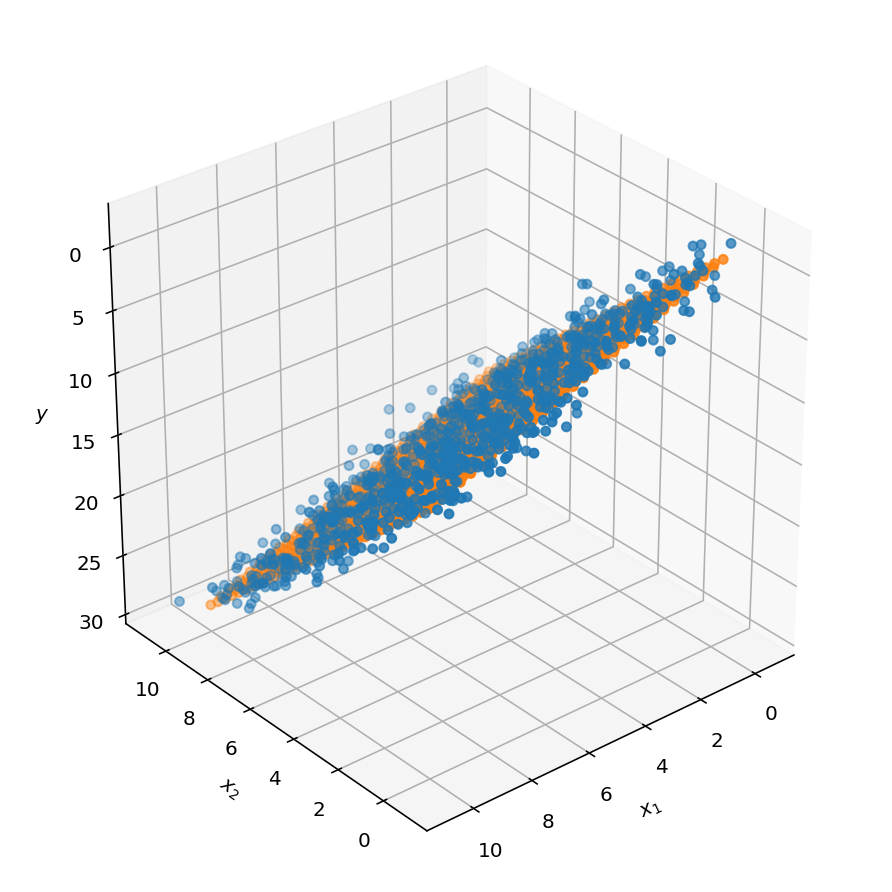

In [5]:
# Visualization.
vis(w0, w1, w2)

### Hyperplane Estimation Using Gradient Descent

In this problem, we would like to use the gradient descent to calculate the parameters $W$ for the hyperplane.
If we have an error function (a.k.a objective function or loss function), then a typical gradient descent algorithm contains the following steps:

**Step 1**. Initialize the parameters W.

for i = 1 to #iterations:

- **Step 2**. Compute the gradient $\nabla \mathcal{L}(W) = \frac{\partial \mathcal{L}(W)}{\partial W}$.

- **Step 3**. Update the parameters $W \leftarrow \mathcal{L}(W) = W - \eta \frac{\partial \mathcal{L}(W)}{\partial W}$ where $\eta$ is the learning rate.

In [6]:
# Gradient of L(W) with respect to W.
def grad_L_W(X, Y, W):
    return 2*X.T.dot(X).dot(W) - 2*X.T.dot(Y)

In [9]:
# y=w0+w1*x1+w2*x2
# Some settings.
Y = Y.reshape(-1, 1)
print(X.shape, Y.shape, W.shape)
iterations    = 20000
learning_rate = 0.000001

# Gradient descent algorithm.
# Step 1. Initialize the parameters W.
W = np.matrix(np.zeros((3,1)))
for i in range(iterations):
    # Step 2. Calculate the gradient of L(W) w.r.t. W. 
    grad = grad_L_W(X, Y, W)
    # Step 3. Update parameters W.
    W_new = W-learning_rate*grad
    W = W_new
      ###Hint: Use grad, W, learning_rate.
    
w0, w1, w2 = np.array(W).reshape(-1)
print('y = {:.2f} + {:.2f}*x1 + {:.2f}*x2'.format(w0, w1, w2))

(900, 3) (900, 1) (3, 1)
y = -0.69 + 0.98*x1 + 1.94*x2


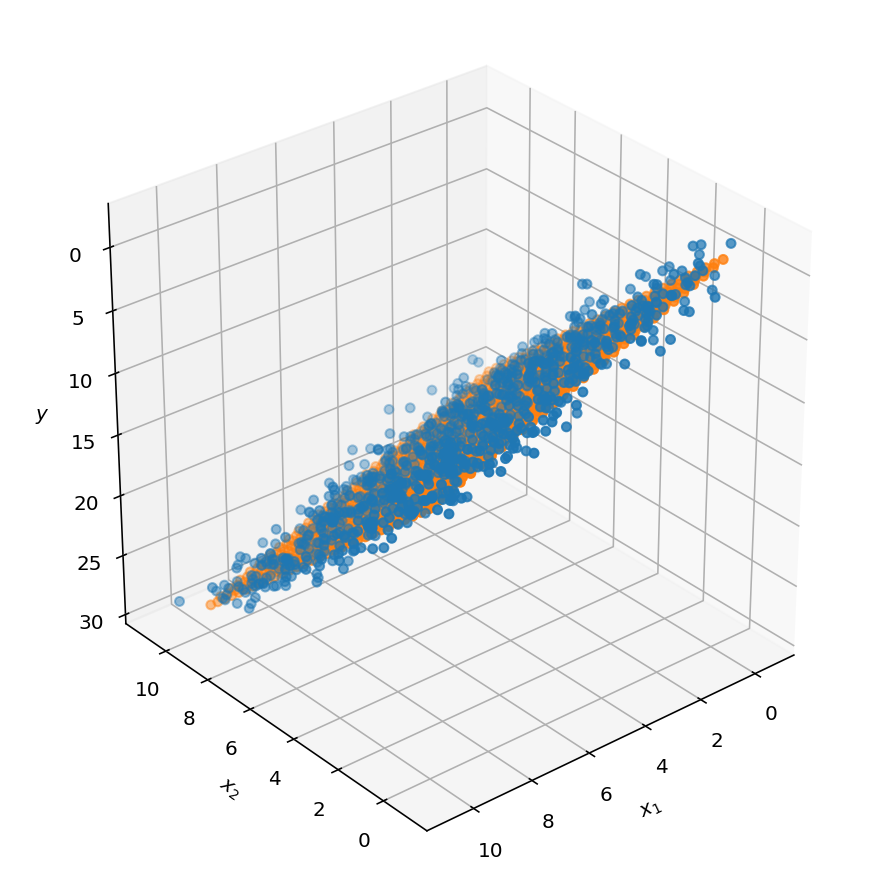

In [10]:
# Visualization.
vis(w0, w1, w2)